In [1]:
import pandas as pd
import numpy as np
import cobra
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%run -i 'metabolic_modeling.py'

# Models to include

In [2]:
models = {}
for filename in os.listdir('./'):
    if filename.endswith(".xml"):
        print(filename)
        model = cobra.io.read_sbml_model(filename)
        model.solver = 'cplex'
        models[filename.replace('.xml','')] = model

Bifidobacterium_animalis_lactis_V9.xml
Bifidobacterium_animalis_lactis_Bl_04_ATCC_SD5219.xml
Bifidobacterium_coryneforme_DSM_20216.xml
Bifidobacterium_bifidum_PRL2010.xml
Bifidobacterium_thermacidophilum_subsp_thermacidophilum_DSM_15837.xml
Bifidobacterium_animalis_lactis_AD011.xml
Bifidobacterium_boum_DSM_20432.xml
Bifidobacterium_gallicum_DSM_20093.xml
Bifidobacterium_longum_DJO10A.xml
Bifidobacterium_bifidum_BGN4.xml
Bifidobacterium_longum_longum_JDM301.xml
Anaerostipes_sp_3_2_56FAA.xml
Bifidobacterium_kashiwanohense_DSM_21854.xml
Bifidobacterium_longum_longum_JCM_1217.xml
Bifidobacterium_pseudolongum_subsp_Pseudolongum_DSM_20099.xml
Anaerostipes_hadrus_DSM_3319.xml
Bifidobacterium_breve_HPH0326.xml
Bifidobacterium_thermophilum_RBL67.xml
Bifidobacterium_breve_UCC2003_NCIMB8807.xml
Bifidobacterium_animalis_lactis_Bi_07.xml
Bifidobacterium_longum_NCC2705.xml
Bifidobacterium_longum_infantis_ATCC_15697.xml
Bifidobacterium_bifidum_NCIMB_41171.xml
Bifidobacterium_dentium_ATCC_27678.xml
Bi

# Essential nutrients

In [4]:
essential_nutrients = []
for name, curr_model in models.items():
    curr_model_copy = deepcopy(curr_model)
    for rxn in curr_model_copy.exchanges:
        rxn.lower_bound = -1000
    res = cobra.flux_analysis.single_reaction_deletion(curr_model_copy, curr_model_copy.exchanges)
    res = res[res['growth'] == 0.0]
    for k in res.index:       
        essential_nutrients.append([name, curr_model_copy.metabolites.get_by_id(list(k)[0].replace('EX_','').replace('(e)','[e]')).name])
df_essential_nutrients = pd.DataFrame(essential_nutrients, columns=['model','nutrient'])
df_essential_nutrients['essential'] = [int(1) for index in df_essential_nutrients.index]
df_essential_nutrients = pd.pivot_table(df_essential_nutrients, values='essential', index='model', columns='nutrient').fillna(int(0))
df_essential_nutrients.head()

nutrient,(R)-Pantothenate,"1,2-Diacyl-sn-glycerol (dioctadecanoyl, n-C18:0)",2-Demethylmenaquinone 8,2-deoxyadenosine,Chloride,Co2+,Cu2+,Cytidine,D-Arabinose,D-Galactose,...,cytosine,glycolaldehyde,hydrogenphosphate,laurate,magnesium,"meso-2,6-Diaminoheptanedioate",octadecanoate (n-C18:0),potassium,sulfate,tetradecanoate (n-C14:0)
model,,,,,,,,,,,,,,,,,,,,,
Anaerostipes_caccae_DSM_14662,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Anaerostipes_hadrus_DSM_3319,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
Anaerostipes_sp_3_2_56FAA,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Bifidobacterium_adolescentis_ATCC_15703,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Bifidobacterium_angulatum_DSM_20098,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


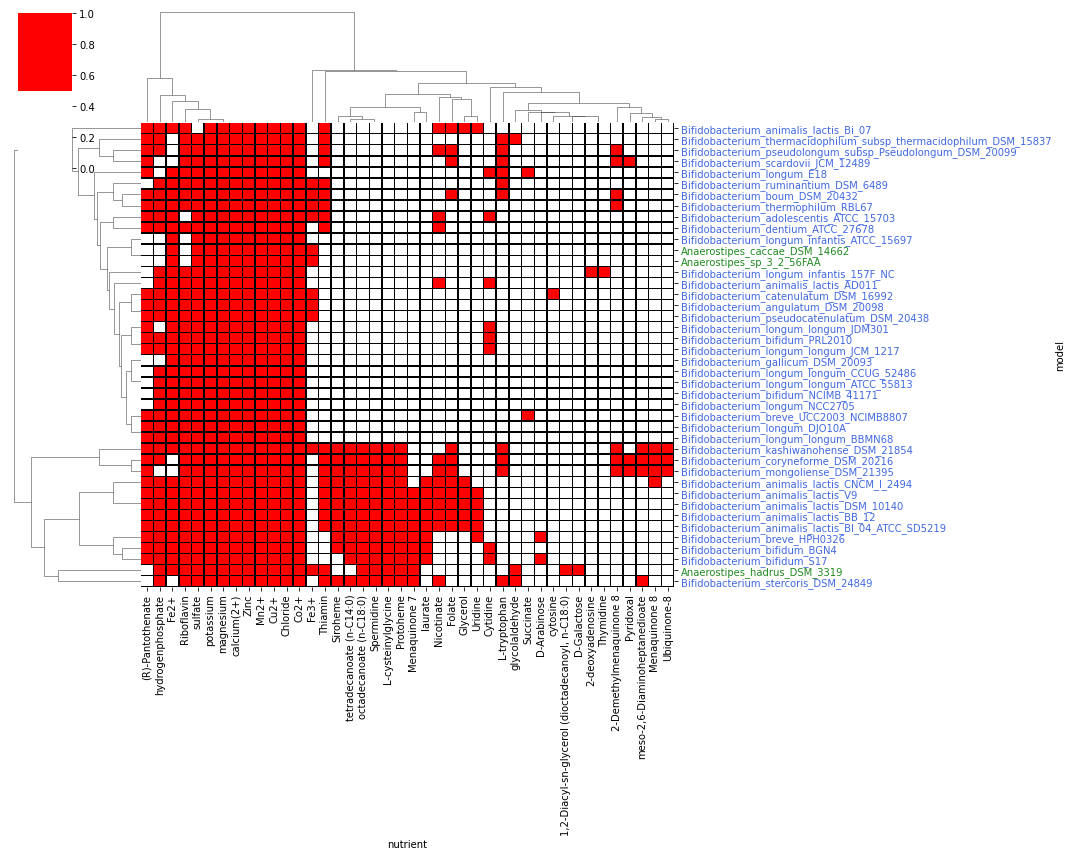

In [9]:
ax = sns.clustermap(df_essential_nutrients,
                    method='average',
                    metric='cityblock',
                    figsize=(15,12),
                    cmap=matplotlib.colors.ListedColormap(['white', 'red']),
                    vmin=0, 
                    vmax=1,
                    linewidths=0.5,
                    linecolor='black'
                   )

for tick_label in ax.ax_heatmap.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    if tick_text.startswith('Bifidobacterium'):
        tick_label.set_color('royalblue')
    else:
        tick_label.set_color('forestgreen')

# Parento frontier (western diet)

In [3]:
dict_western = pd.read_csv('WesternDietAGORA.txt', sep='\t', header=None, index_col=0).to_dict()[1]
dict_western = {k.replace('(e)','_m'):v for k,v in dict_western.items()}

In [7]:
Bifidobacterium_models = [key for key in models.keys() if key.startswith('Bifidobacterium')]
Anaerostipes_models = [key for key in models.keys() if key.startswith('Anaerostipes')]

pareto_front_western = []
for m1 in Bifidobacterium_models:
    for m2 in Anaerostipes_models:
        taxonomy = pd.DataFrame([[m1,0.5],[m2,0.5]],columns=['model_name','biomass'])
        model = build_community_model(taxonomy,
                                      AGORA_model_dir='./',
                                      steady_com=False,
                                      biomass_coupling=True)
        model = set_culture_medium(model, dict_western)
        output = pareto_front_2species(model)
        pareto_front_western = pareto_front_western + output
pickle.dump(pareto_front_western, open("pareto_front_western.p","wb"))

# Parento frontier (high fiber diet)

In [27]:
dict_highfiber = pd.read_csv('HighFiberDietAGORA.txt', sep='\t', header=None, index_col=0).to_dict()[1]
dict_highfiber = {k.replace('(e)','_m'):v for k,v in dict_highfiber.items()}

In [28]:
Bifidobacterium_models = [key for key in models.keys() if key.startswith('Bifidobacterium')]
Anaerostipes_models = [key for key in models.keys() if key.startswith('Anaerostipes')]
          
pareto_front_highfiber = []
for m1 in Bifidobacterium_models:
    for m2 in Anaerostipes_models:
        taxonomy = pd.DataFrame([[m1,0.5],[m2,0.5]],columns=['model_name','biomass'])
        model = build_community_model(taxonomy,
                                      AGORA_model_dir='./',
                                      steady_com=False,
                                      biomass_coupling=True)
        model = set_culture_medium(model, dict_highfiber)
        assert 0
        output = pareto_front_2species(model)
        pareto_front_highfiber = pareto_front_highfiber + output
pickle.dump(pareto_front_highfiber, open("pareto_front_highfiber.p","wb"))

# Plot

Text(0, 0.5, 'Anaerostipes')

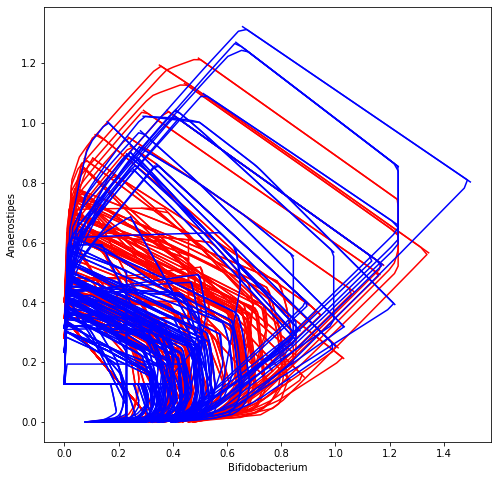

In [12]:
pareto_front_western = pickle.load(open("pareto_front_western.p", "rb"))
pareto_front_highfiber = pickle.load(open("pareto_front_highfiber.p", "rb"))

fig, ax = plt.subplots(figsize=(8,8), nrows=1, ncols=1)

# western diet
for l in np.arange(len(pareto_front_western)):
    data = pareto_front_western[l]
    if data[0].startswith('Bifidobacterium'):
        ax.plot(data[2], data[3], 'r-')
    else:
        ax.plot(data[3], data[2], 'r-')
        
# high fiber diet
for l in np.arange(len(pareto_front_highfiber)):
    data = pareto_front_highfiber[l]
    if data[0].startswith('Bifidobacterium'):
        ax.plot(data[2], data[3], 'b-')
    else:
        ax.plot(data[3], data[2], 'b-')

ax.set_xlabel('Bifidobacterium')
ax.set_ylabel('Anaerostipes')